# **üìåExtracci√≥n**

## Extracci√≥n de datos

In [ ]:
# Importar librer√≠as
import pandas as pd
import numpy as np

# Extraer datos desde la api
datos = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [ ]:
# Normalizar datos de cliente y dem√°s columnas
datos_customer = pd.json_normalize(datos['customer'])
datos_customer.head()

gender  SeniorCitizen Partner Dependents  tenure
0  Female              0     Yes        Yes       9
1    Male              0      No         No       9
2    Male              0      No         No       4
3    Male              1     Yes         No      13
4  Female              1     Yes         No       3

In [ ]:
datos_phone = pd.json_normalize(datos['phone'])
datos_phone.head()

PhoneService MultipleLines
0          Yes            No
1          Yes           Yes
2          Yes            No
3          Yes            No
4          Yes            No

In [ ]:
datos_internet = pd.json_normalize(datos['internet'])
datos_internet.head()

InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No         Yes   
1             DSL             No           No               No          No   
2     Fiber optic             No           No              Yes          No   
3     Fiber optic             No          Yes              Yes          No   
4     Fiber optic             No           No               No         Yes   

  StreamingTV StreamingMovies  
0         Yes              No  
1          No             Yes  
2          No              No  
3         Yes             Yes  
4         Yes              No

In [ ]:
datos_account = pd.json_normalize(datos['account'])
datos_account.head()

Contract PaperlessBilling     PaymentMethod  Charges.Monthly  \
0        One year              Yes      Mailed check             65.6   
1  Month-to-month               No      Mailed check             59.9   
2  Month-to-month              Yes  Electronic check             73.9   
3  Month-to-month              Yes  Electronic check             98.0   
4  Month-to-month              Yes      Mailed check             83.9   

  Charges.Total  
0         593.3  
1         542.4  
2        280.85  
3       1237.85  
4         267.4

In [ ]:
# Agregar las columnas normalizadas y eliminar las anteriores
df = pd.concat([datos.drop(columns=['customer', 'phone', 'internet', 'account']),
                                datos_customer, datos_phone, datos_internet, datos_account], axis = 1)
df

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]

# **üîßTransformaci√≥n**

## Conjunto de datos

In [ ]:
# Informaci√≥n de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Comprobaci√≥n de incoherencias

In [ ]:
# B√∫squeda de valores nulos
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [ ]:
# Valores √∫nicos de cada columna
columnas = df.columns

for columna in columnas:
  print(f'Datos √∫nicos en {columna}: {df[columna].unique()}')

Datos √∫nicos en customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Datos √∫nicos en Churn: ['No' 'Yes' '']
Datos √∫nicos en gender: ['Female' 'Male']
Datos √∫nicos en SeniorCitizen: [0 1]
Datos √∫nicos en Partner: ['Yes' 'No']
Datos √∫nicos en Dependents: ['Yes' 'No']
Datos √∫nicos en tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Datos √∫nicos en PhoneService: ['Yes' 'No']
Datos √∫nicos en MultipleLines: ['No' 'Yes' 'No phone service']
Datos √∫nicos en InternetService: ['DSL' 'Fiber optic' 'No']
Datos √∫nicos en OnlineSecurity: ['No' 'Yes' 'No internet service']
Datos √∫nicos en OnlineBackup: ['Yes' 'No' 'No internet service']
Datos √∫nicos en DeviceProtection: ['No' 'Yes' 'No internet service']
Datos √∫nicos en TechSupport: ['Yes' 'No' 'No internet service

In [ ]:
# Debido a que hay varios valores √∫nicos en Charges.Total pero en la info
# aparace como dato de tipo object, se busca qu√© datos no num√©ricos hay
valores_no_numericos = df[pd.to_numeric(df['Charges.Total'], errors='coerce').isna()]
no_numericos_unicos = valores_no_numericos['Charges.Total'].unique()
print(f'Valores no n√∫mericos √∫nicos encontrados: {no_numericos_unicos}')

Valores no n√∫mericos √∫nicos encontrados: [' ']


In [ ]:
print(f"Filas con '' en Churn: {(df['Churn'] == '').sum()}")
print(f"Filas con ' ' en Charges.Total: {(df['Charges.Total'] == ' ').sum()}")

Filas con '' en Churn: 224
Filas con ' ' en Charges.Total: 11


## Manejo de inconsistencias

In [ ]:
# Debido a que son pocas filas, se procede a eliminarlas
df['Churn'] = df['Churn'].replace('', np.nan)
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

df = df.dropna(subset=['Churn', 'Charges.Total']).copy()

In [ ]:
# Se han eliminado las filas que conten√≠an valores faltantes
df.shape

(7032, 21)

In [ ]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

## Columna de cuentas diarias

In [ ]:
# Agregar columna de cuentas diarias
df['CuentasDiarias'] = (df['Charges.Monthly']/30).round(2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## Estandarizaci√≥n

In [ ]:
columnas_categoricas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
                        'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   category
 4   Partner           7032 non-null   category
 5   Dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   category
 8   MultipleLines     7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  Contract          7032 non-nu

# **üìäCarga y an√°lisis**

## **An√°lisis descriptivo**

### **Columnas num√©ricas**



In [ ]:
df.describe()

tenure  Charges.Monthly  Charges.Total  CuentasDiarias
count  7032.000000      7032.000000    7032.000000     7032.000000
mean     32.421786        64.798208    2283.300441        2.159891
std      24.545260        30.085974    2266.771362        1.002955
min       1.000000        18.250000      18.800000        0.610000
25%       9.000000        35.587500     401.450000        1.187500
50%      29.000000        70.350000    1397.475000        2.340000
75%      55.000000        89.862500    3794.737500        2.992500
max      72.000000       118.750000    8684.800000        3.960000

### **Columnas categ√≥ricas**

In [ ]:
cat_cols = df.select_dtypes(include='category').columns
print(df[cat_cols].describe())

       Churn gender  SeniorCitizen Partner Dependents PhoneService  \
count   7032   7032           7032    7032       7032         7032   
unique     2      2              2       2          2            2   
top       No   Male              0      No         No          Yes   
freq    5163   3549           5890    3639       4933         6352   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472     

## **Distribuvi√≥n de evasi√≥n**

In [ ]:
# Importar librer√≠as
import matplotlib.pyplot as plt
import seaborn as sns

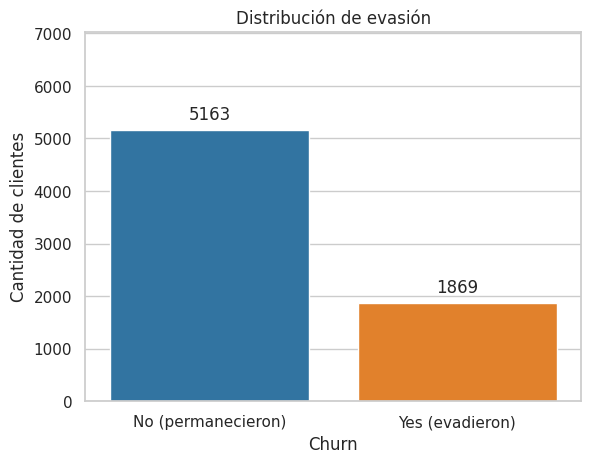

In [ ]:
sns.set_theme(style='whitegrid')
counts = df['Churn'].value_counts().reset_index()
counts.columns = ['Churn', 'Cantidad']

def graficar_distribucion_evasion():
  sns.barplot(data=counts, x='Churn', y='Cantidad', hue=counts.index,
              palette='tab10', legend=False)

  for index, row in counts.iterrows():
      plt.text(index, row['Cantidad'] + 200, row['Cantidad'], ha='center')

  plt.title('Distribuci√≥n de evasi√≥n')
  plt.xlabel('Churn')
  plt.ylabel('Cantidad de clientes')
  plt.xticks(ticks=[0, 1], labels=['No (permanecieron)', 'Yes (evadieron)'])
  plt.ylim(0, 7032)

  plt.show()

graficar_distribucion_evasion()

## **Recuento de evaci√≥n por variables categ√≥ricas**

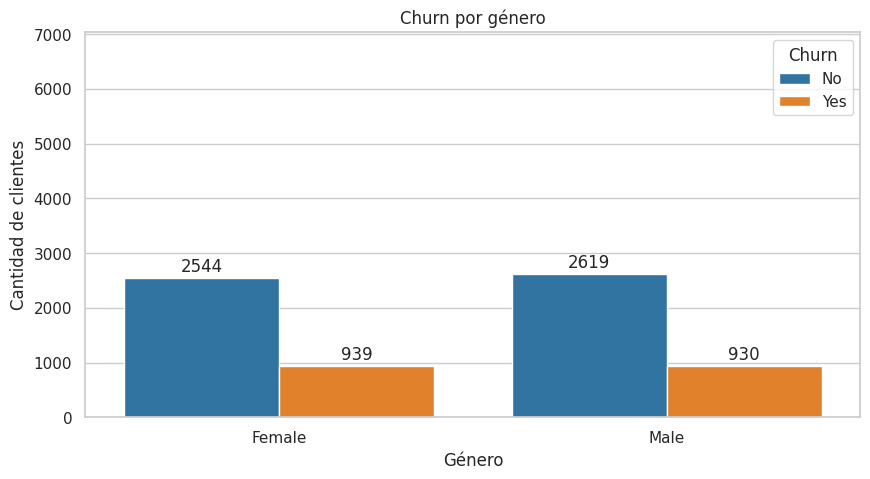

In [ ]:
def grafica_categorica(columna, titulo, xlabel):
  # Contar Yes/No por dependientes
  counts = df.groupby([columna, 'Churn'], observed=True).size().reset_index(name='Cantidad')

  # Graficar con barras agrupadas
  plt.figure(figsize = (10,5))
  ax = sns.barplot(data=counts, x=columna, y='Cantidad', hue='Churn',
              palette='tab10')

  for container in ax.containers:
      ax.bar_label(container, label_type='edge', padding=2)

  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel('Cantidad de clientes')
  plt.ylim(0, 7032)
  plt.show()

grafica_categorica('gender', 'Churn por g√©nero', 'G√©nero')

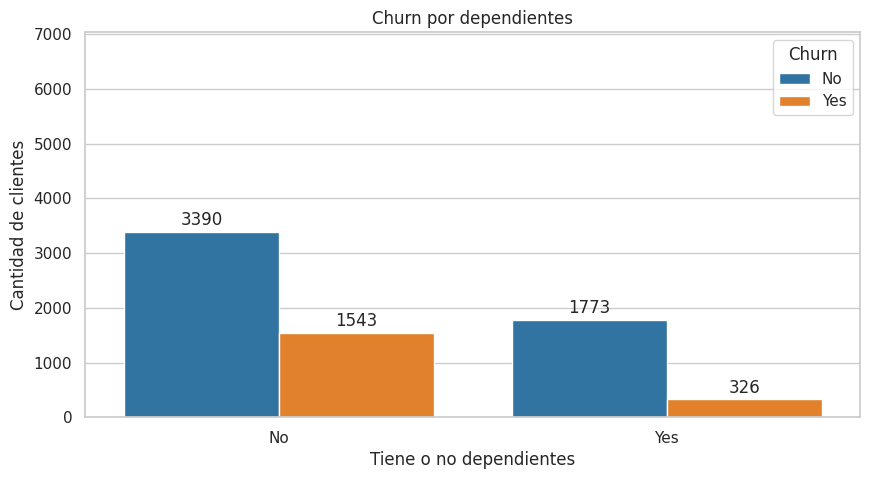

In [ ]:
grafica_categorica('Dependents', 'Churn por dependientes', 'Tiene o no dependientes')

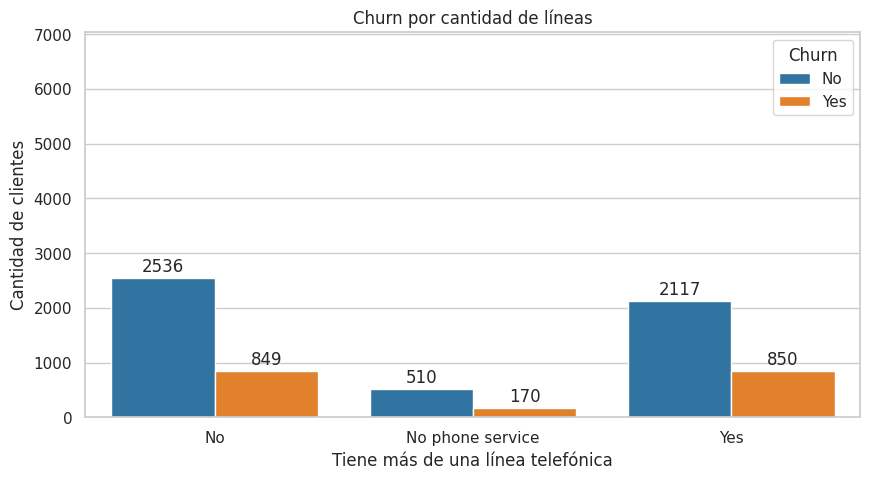

In [ ]:
grafica_categorica('MultipleLines', 'Churn por cantidad de l√≠neas', 'Tiene m√°s de una l√≠nea telef√≥nica')

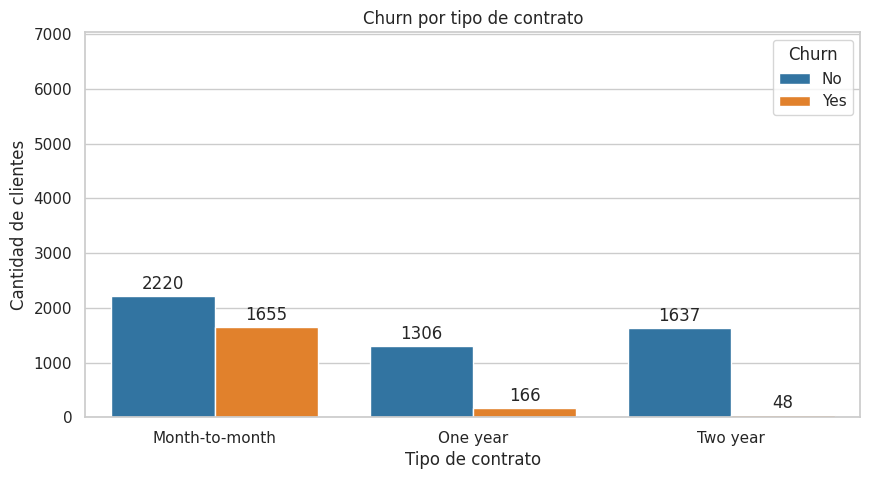

In [ ]:
grafica_categorica('Contract', 'Churn por tipo de contrato', 'Tipo de contrato')

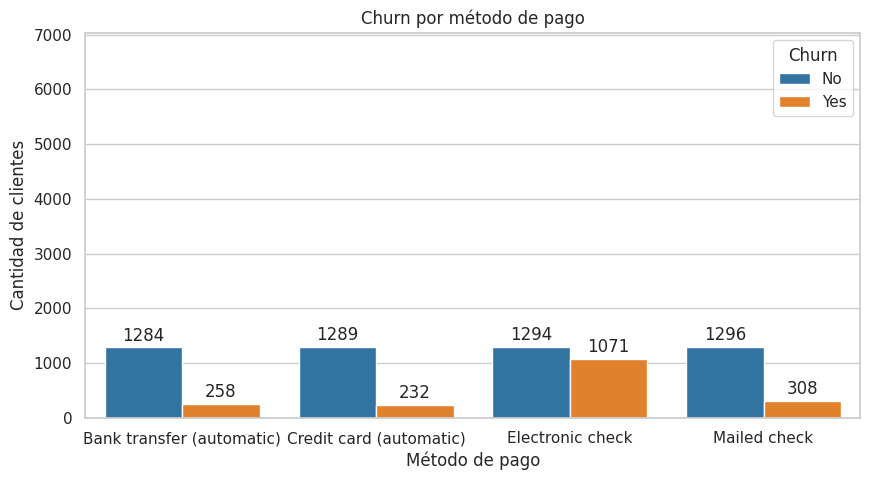

In [ ]:
grafica_categorica('PaymentMethod', 'Churn por m√©todo de pago', 'M√©todo de pago')

## **Conteo de evasi√≥n por variables num√©ricas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   category
 4   Partner           7032 non-null   category
 5   Dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   category
 8   MultipleLines     7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  Contract          7032 non-nu

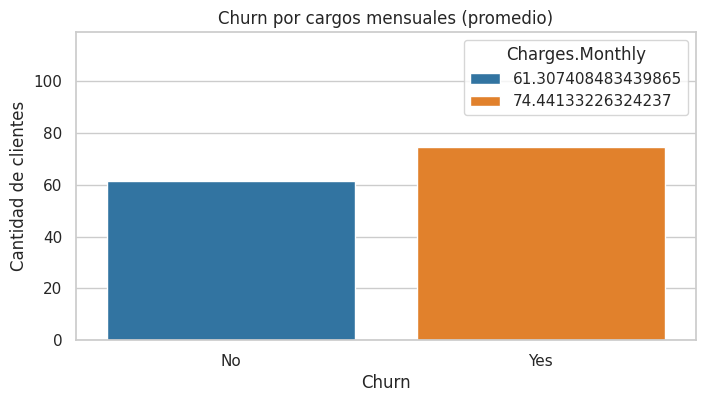

In [ ]:
def grafica_numerica(columna, titulo, xlabel, y):
  # Contar Yes/No por dependientes
  promedios = df.groupby('Churn', observed=True)[columna].mean().reset_index()

  # Graficar con barras agrupadas
  plt.figure(figsize = (8,4))
  ax = sns.barplot(data=promedios, x='Churn', y=columna, hue=columna,
              palette='tab10')

  # for container in ax.containers:
  #     ax.bar_label(container, label_type='edge', padding=2)

  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel('Cantidad de clientes')
  plt.ylim(0, y)
  plt.show()

grafica_numerica('Charges.Monthly', 'Churn por cargos mensuales (promedio)', 'Churn', 118.75)

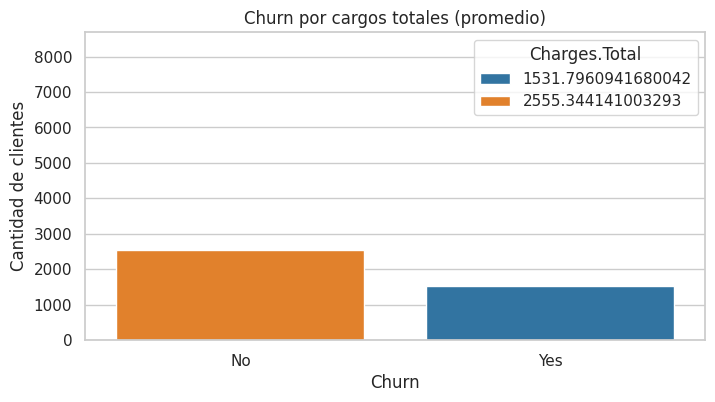

In [ ]:
grafica_numerica('Charges.Total', 'Churn por cargos totales (promedio)', 'Churn', 8684.80)

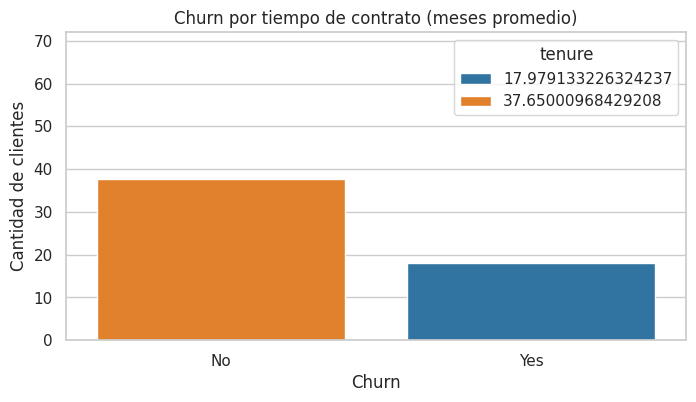

In [ ]:
grafica_numerica('tenure', 'Churn por tiempo de contrato (meses promedio)', 'Churn', 72)

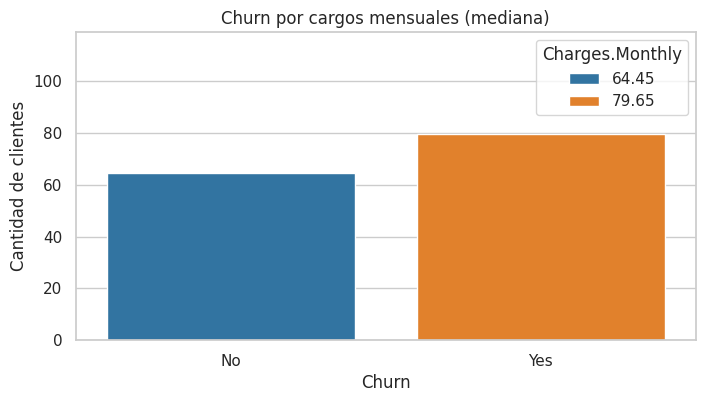

In [87]:
def grafica_numerica_mediana(columna, titulo, xlabel, y):
  # Contar Yes/No por dependientes
  promedios = df.groupby('Churn', observed=True)[columna].median().reset_index()

  # Graficar con barras agrupadas
  plt.figure(figsize = (8,4))
  ax = sns.barplot(data=promedios, x='Churn', y=columna, hue=columna,
              palette='tab10')

  # for container in ax.containers:
  #     ax.bar_label(container, label_type='edge', padding=2)

  plt.title(titulo)
  plt.xlabel(xlabel)
  plt.ylabel('Cantidad de clientes')
  plt.ylim(0, y)
  plt.show()

grafica_numerica_mediana('Charges.Monthly', 'Churn por cargos mensuales (mediana)', 'Churn', 118.75)

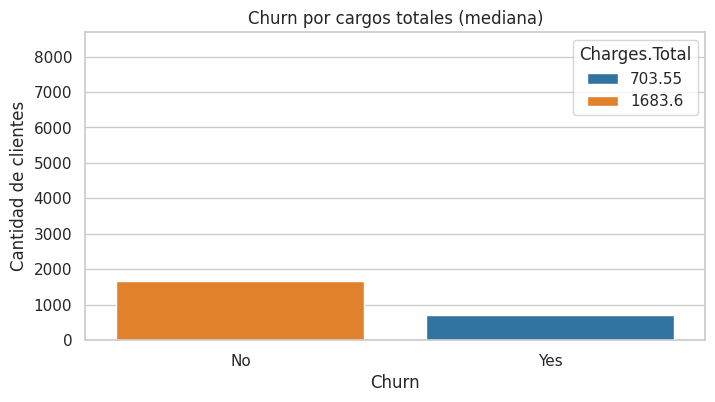

In [ ]:
grafica_numerica_mediana('Charges.Total', 'Churn por cargos totales (mediana)', 'Churn', 8684.80)

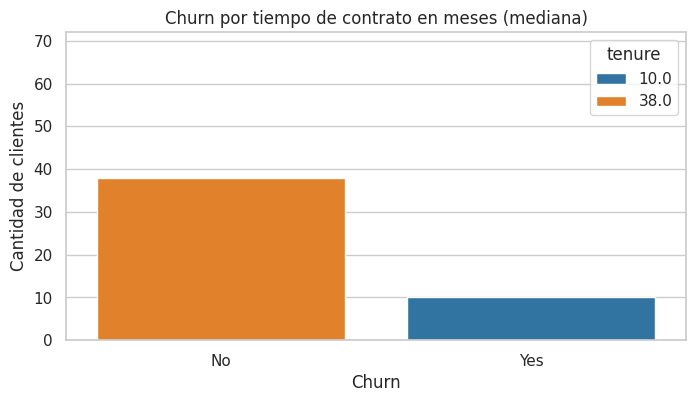

In [ ]:
grafica_numerica_mediana('tenure', 'Churn por tiempo de contrato en meses (mediana)', 'Churn', 72)

## **Informe final**

### **Introducci√≥n**

La empresa Telecom X enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la p√©rdida de clientes. Para esto se realiz√≥ una recopilaci√≥n, procesamiento y an√°lisis de los datos disponibles para extraer informaci√≥n valiosa.

En este informe se describe el procedimiento y se presenta el an√°lisis de los resultados obtenidos en este ejercicio.

### **Limpieza y Tratamiento de Datos**

El primer paso fue extraer la informaci√≥n desde una API utilizando pandas. El archivo de extensi√≥n json contaba con 3 columnas que conten√≠an m√°s informaci√≥n en forma de diccionario de python, por lo que dichas columnas se necesitaron normalizar para despu√©s concatenar todas las nuevas columnas obtenidas y retirar las iniciales.

Observando y obteniendo el tipo de datos y los valores √∫nicos de cada columna se hizo la comprobaci√≥n de inconsistencias para posteriormente tratarlas. En el caso de datos faltantes o cadenas de texto vac√≠o se procedi√≥ eliminando las filas enteras debido a que representaban aproximadamente el 3% de los datos totales.

Posteriormente se cre√≥ la columna de cuentas diarias a partir de la columna de cuentas mensuales.

Finalmente, se estandarizaron las columnas con contenido categ√≥rico y num√©ricos para su futura manipulaci√≥n.


### **An√°lisis Exploratorio de Datos**

El primer paso del an√°lisis fue describir las columnas categ√≥ricas y num√©ricas para poder comprender el comportamiento de los clientes en esta empresa

De las columnas num√©ricas se obtuvo:

**Tenure (Meses de contrato del cliente)**

* Promedio: 32.42 meses
* M√≠nimo: 1 mes
* M√°ximo: 72 meses
* Mediana: 29 meses
* Desviaci√≥n est√°ndar: 24.54 meses

La media (32.42) es mayor que la mediana (29), lo cual sugiere una ligera asimetr√≠a positiva o sesgo a la derecha. Esto podr√≠a indicar que hay algunos casos con permanencias muy largas (cercanas al m√°ximo de 72 meses) que est√°n ‚Äúempujando‚Äù la media hacia arriba.

La desviaci√≥n est√°ndar es alta (24.54) en comparaci√≥n con la media, lo que significa que los valores de permanencia est√°n muy dispersos: hay mucha variabilidad entre unos y otros. La permanencia no parece ser consistente; algunas personas permanecen muy poco tiempo, mientras que otras se quedan muchos a√±os.

---
**Charges monthly**

* Promedio: 64.79
* M√≠nimo: 18.25
* M√°ximo: 118.75
* Mediana: 70.35
* Desviaci√≥n est√°ndar: 30.08

La media (64.79) es menor que la mediana (70.35), lo cual sugiere una asimetr√≠a negativa: hay una mayor concentraci√≥n de valores altos, y unos pocos valores bajos podr√≠an estar jalando la media hacia abajo.

La desviaci√≥n est√°ndar de 30.08 es casi la mitad de la media, lo cual indica una dispersi√≥n considerable en los cargos mensuales.

Con un m√≠nimo de 18.25 y un m√°ximo de 118.75, el rango es de 100.5 unidades, lo que sugiere una variedad significativa de planes o consumos mensuales.

---
**Charges total**

* Promedio: 2283.30
* M√≠nimo: 18.80
* M√°ximo: 8684.80
* Mediana: 1397.47
* Desviaci√≥n est√°ndar: 2266.77

La media (2283.30) es mucho mayor que la mediana (1397.47), lo que sugiere una fuerte asimetr√≠a positiva: la mayor√≠a de los clientes tiene cargos totales m√°s bajos, pero hay algunos con cargos extremadamente altos que elevan la media.

La desviaci√≥n est√°ndar (2266.77) es casi igual a la media, lo que indica que los valores est√°n muy dispersos.

Un m√°ximo de 8684.80, frente a un m√≠nimo de apenas 18.80, revela una enorme diferencia entre casos.

Mientas que de las columnas caterg√≥ricas se obtuvo:

**Churn**

73.42% de clientes no ha evadido (una gran mayor√≠a).

**Gender**

50.47% de clientes es hombres (valor muy cercano a la mitad)

**Senior Citizen**

83.75% de clientes son menores de 65 a√±os.

**Partner**

51.75% de clientes no tiene pareja.

**Dependents**

70.15% de clientes no tiene dependientes.

**Phone Service**

90.32% de clientes tienen el servicio de tel√©fono.

**Multiple Lines**

48.13% de clientes tiene suscripci√≥n a m√°s de una l√≠nea tel√©f√≥nica.

**Internet Service**

44.02% tienen suscripci√≥n a un proveedor de internet.

---
Del resto de suscripciones adicionales, el porcentaje es cercano o menor al 50%.

---
**Contract**

De las 3 opciones de contrato, la opc√≠o m√°s elegida es mes a mes con un 55.10%.

**PaperlessBilling**

59.27% de clientes prefiere recibir la factura en l√≠nea.

**Payment Method**

De los 4 m√©todos de pago, el m√°s usado es Electronic check con un 33.63%.

Posteriormente se obtuvo la distribuci√≥n de evasi√≥n que solo cuenta con las respuestas s√≠ o no, se pudo observar que el 26.57% de clientes ha evadido.

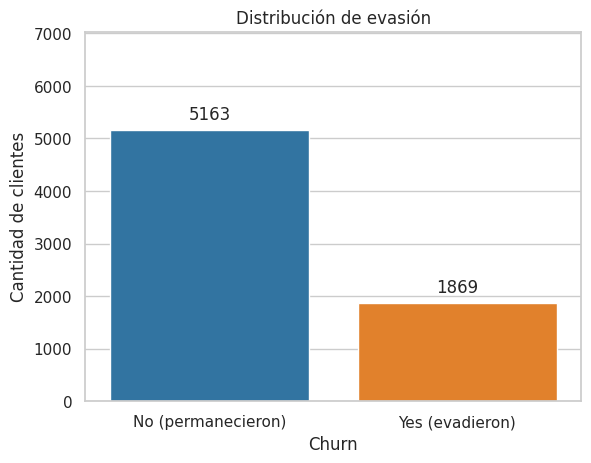

Se analizaron el recuento de evasi√≥n por columnas categ√≥ricas y columnas como g√©nero, senior citizen, o multiple lines no presentan una gran disparidad porcentual respecto a los clientes que evadieron y los que no. Por otro lado, hay patrones notorios en la evasi√≥n para el tipo de contrato y el m√©todo de pago.

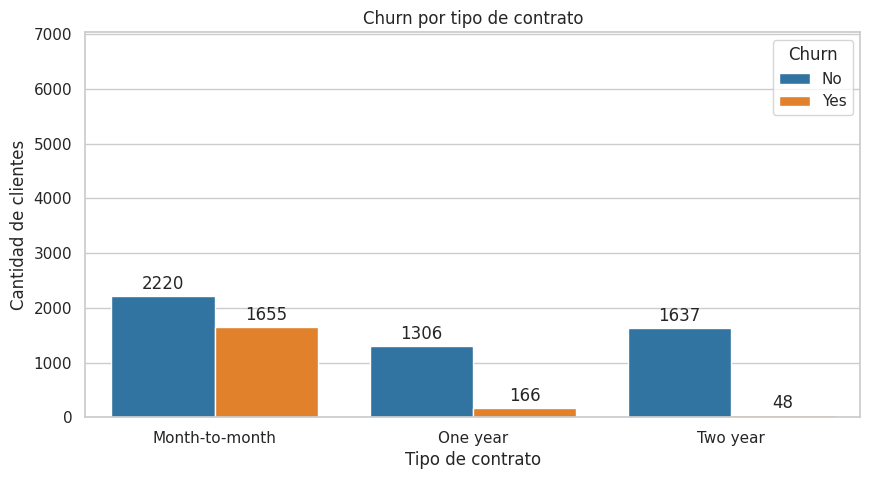

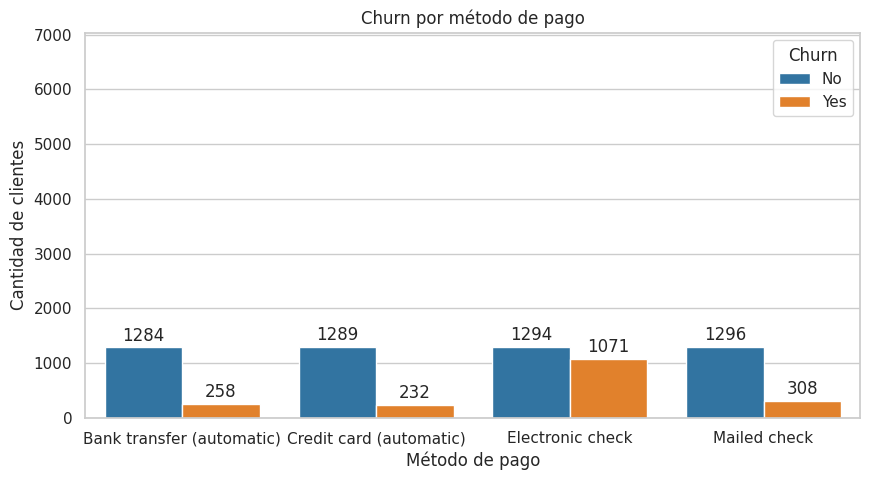

Para el conteo de evasi√≥n por variables num√©ricas se consider√≥ el promedio y la mediana de los datos en las columnas de cuentas y tiempo de contrato. A pesar de la dispersi√≥n de los datos no hay mucha diferencia entre la mediana y el promedio de estos conjuntos de datos

En general, en los clientes que evadieron se observan cuentas mensuales m√°s altas pero cuentas totales m√°s bajas, esto se se explica visualizando el tiempo de contrato, en el que los clientes que evadieron muestran menor cantidad de meses (en promedio casi dos a√±os menos de tiempo de contrato).

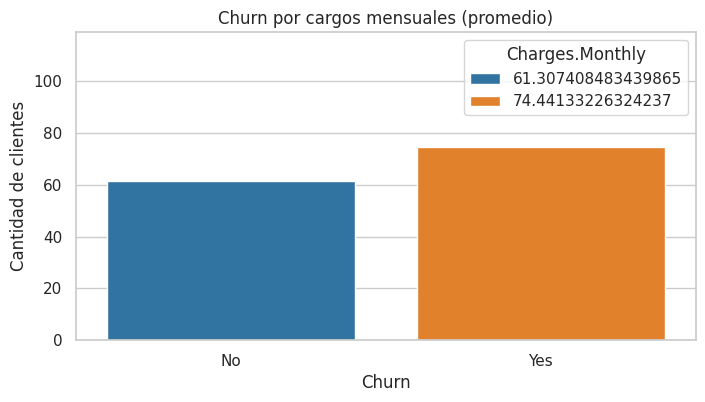

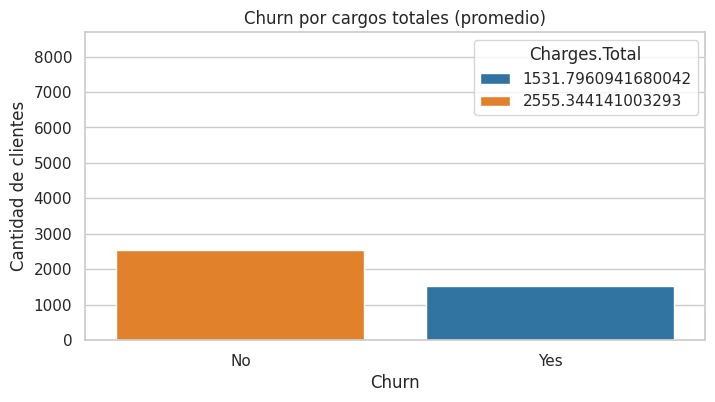

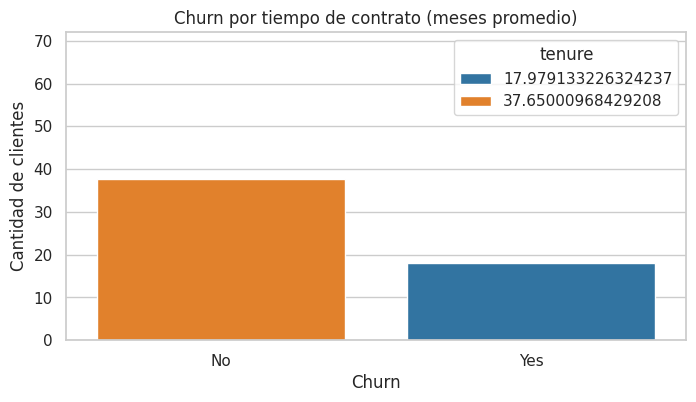

### **Conclusiones e Insights**



*   M√°s del 25% de clientes a evadido.
*   Existe una relaci√≥n entre la evasi√≥n y el tipo de contrato "mes a mes".
*   Existe una relaci√≥n entre la evasi√≥n y el m√©todo de pago "Cheque electr√≥nico"
*   Los clientes que evaden tienen m√°s cuentas mensuales pero menos cuentas totales, al mismo tiempo que menos tiempo de contrato.



### **Recomendaciones**

1. Fidelizaci√≥n de clientes con contrato mensual:

* Ofrecer incentivos para migrar a contratos de mayor plazo (descuentos por pago anual o trimestral, beneficios adicionales por permanencia).

* Dise√±ar campa√±as espec√≠ficas para clientes con contrato ‚Äúmes a mes‚Äù, ya que presentan mayor probabilidad de evasi√≥n.

2. Optimizar m√©todo de pago:

* Promover m√©todos de pago autom√°ticos o con menor fricci√≥n (tarjeta, d√©bito autom√°tico) para clientes que actualmente usan ‚Äúcheque electr√≥nico‚Äù, acompa√±ado de beneficios por cambiar.

* Analizar si este m√©todo est√° asociado a clientes menos digitalizados y crear estrategias de retenci√≥n para ese segmento.

3. Incrementar valor percibido en clientes con bajo tiempo de permanencia:

* Implementar un onboarding m√°s robusto en los primeros meses (seguimiento personalizado, beneficios de bienvenida, soporte proactivo).

* Crear ofertas de ‚Äúupgrade‚Äù o paquetes con m√°s valor a clientes que reci√©n inician para evitar deserci√≥n temprana.

4. Maximizar ingresos de clientes con alta facturaci√≥n mensual pero baja facturaci√≥n total:

* Identificar a los clientes de alto gasto mensual que abandonan pronto y dise√±ar ofertas de retenci√≥n personalizadas.

* Analizar si el alto costo mensual est√° generando insatisfacci√≥n o sensaci√≥n de poca relaci√≥n costo-beneficio.